In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.datasets import fetch_california_housing

#load data
housing = fetch_california_housing()
print (housing.data.shape, housing.target.shape)

(20640, 8) (20640,)


In [48]:
print (housing.feature_names[0:6])

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


In [49]:
#Split data (80-train, 20-test)
x, y = housing.data, housing.target
x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size=0.2, random_state=42)


In [50]:
#Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) 
x_test_scaled = scaler.transform(x_test)

#Initialize and train SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(x_train_scaled, y_train)

#Make predictions
y_pred = sgd_reg.predict(x_test_scaled)

#Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")



Mean Squared Error: 0.5506
R^2 Score: 0.5798


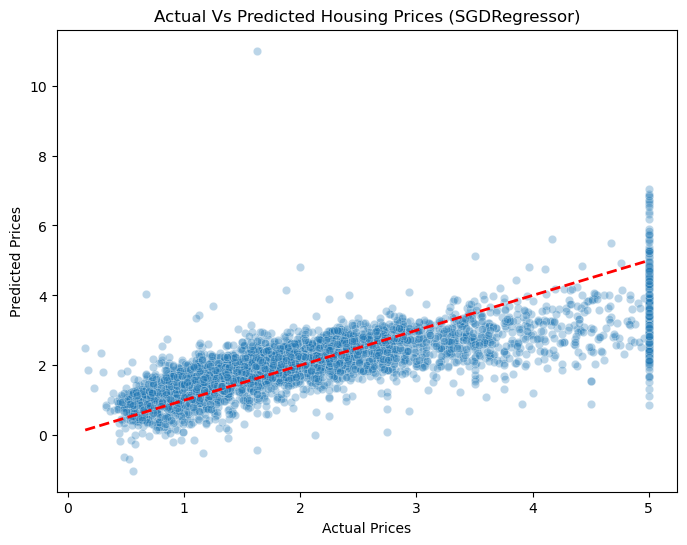

In [58]:
#Visualize actual vs. predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Vs Predicted Housing Prices (SGDRegressor)")
plt.show()